In [80]:
import pandas as pd
df = pd.read_csv('../datasets/코스피.csv')

In [52]:
df['분식기업'].value_counts()

0.0    6906
1.0     139
Name: 분식기업, dtype: int64

In [53]:
df.columns

Index(['Symbol', '상장연도', 'Name', '회계년', '매출총이익률(%)', '영업이익률(%)', '당기순이익률(%)',
       '자본금영업이익률(%)', '영업수익/영업비용(%)', '세전계속사업이익률(%)', '자본금세전계속사업이익률(%)',
       '자본금지배주주순이익률(%)', '매출액증가율(전년동기)(%)', '영업이익증가율(전년동기)(%)',
       '당기순이익증가율(전년동기)(%)', '총자본증가율(전년동기)(%)', '유형자산증가율(전년동기)(%)', '부채비율(%)',
       '유동비율(%)', '당좌비율(%)', '현금비율(%)', '유형자산구성비율(%)', '무형자산구성비율(%)',
       '판관비율(%)', '타인자본비율(%)', '총자산회전율(회)', '매출채권회전율(회)', '재고자산회전율(회)',
       '총부채회전율(회)', '총자본회전율(회)', '자본금회전율(회)', '고정자산회전율(회)', '현금흐름/총부채(%)',
       '현금흐름/영업수익(%)', '현금흐름/총자본(%)', '영업현금흐름/투자현금흐름(%)', 'DSRI', 'GMI', 'AQI',
       'SGI', 'DEPI', 'SGAI', 'LVGI', 'TATA', '벤포드', '분식기업'],
      dtype='object')

In [81]:
from sklearn.model_selection import train_test_split
X = df.drop(['Symbol', '상장연도', 'Name', '회계년', '벤포드', '분식기업'], axis = 1)
y = df['분식기업']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [65]:
X_train.head(3)

,매출총이익률(%),영업이익률(%),당기순이익률(%),자본금영업이익률(%),영업수익/영업비용(%),세전계속사업이익률(%),자본금세전계속사업이익률(%),자본금지배주주순이익률(%),매출액증가율(전년동기)(%),영업이익증가율(전년동기)(%),...,현금흐름/총자본(%),영업현금흐름/투자현금흐름(%),DSRI,GMI,AQI,SGI,DEPI,SGAI,LVGI,TATA
1161,9.58,-19.71,-19.08,-53.71,83.53,-20.63,-56.20,-51.98,-41.13,110.44,...,-6.45,-0.644201,1.60,1.14,1.01,0.59,0.05,1.79,0.94,0.02
3781,17.88,2.25,1.81,19.44,102.30,1.68,14.55,15.69,19.35,-151.55,...,16.18,1.441016,1.35,0.84,1.37,1.19,0.20,0.78,0.93,0.08
3045,100.00,13.78,9.34,16.40,115.99,14.22,16.92,11.11,20.30,-26.76,...,1.02,-0.707718,1.58,1.00,1.00,1.20,0.28,1.11,1.18,0.00


In [59]:
y_train.head(3)

1161    0.0
3781    0.0
3045    0.0
Name: 분식기업, dtype: float64

## 이상치 boxplot으로 확인

C:\Users\Master\AppData\Local\Temp\ipykernel_13668\409300274.py:17: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()  # subplot 간격 조정
c:\Users\Master\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


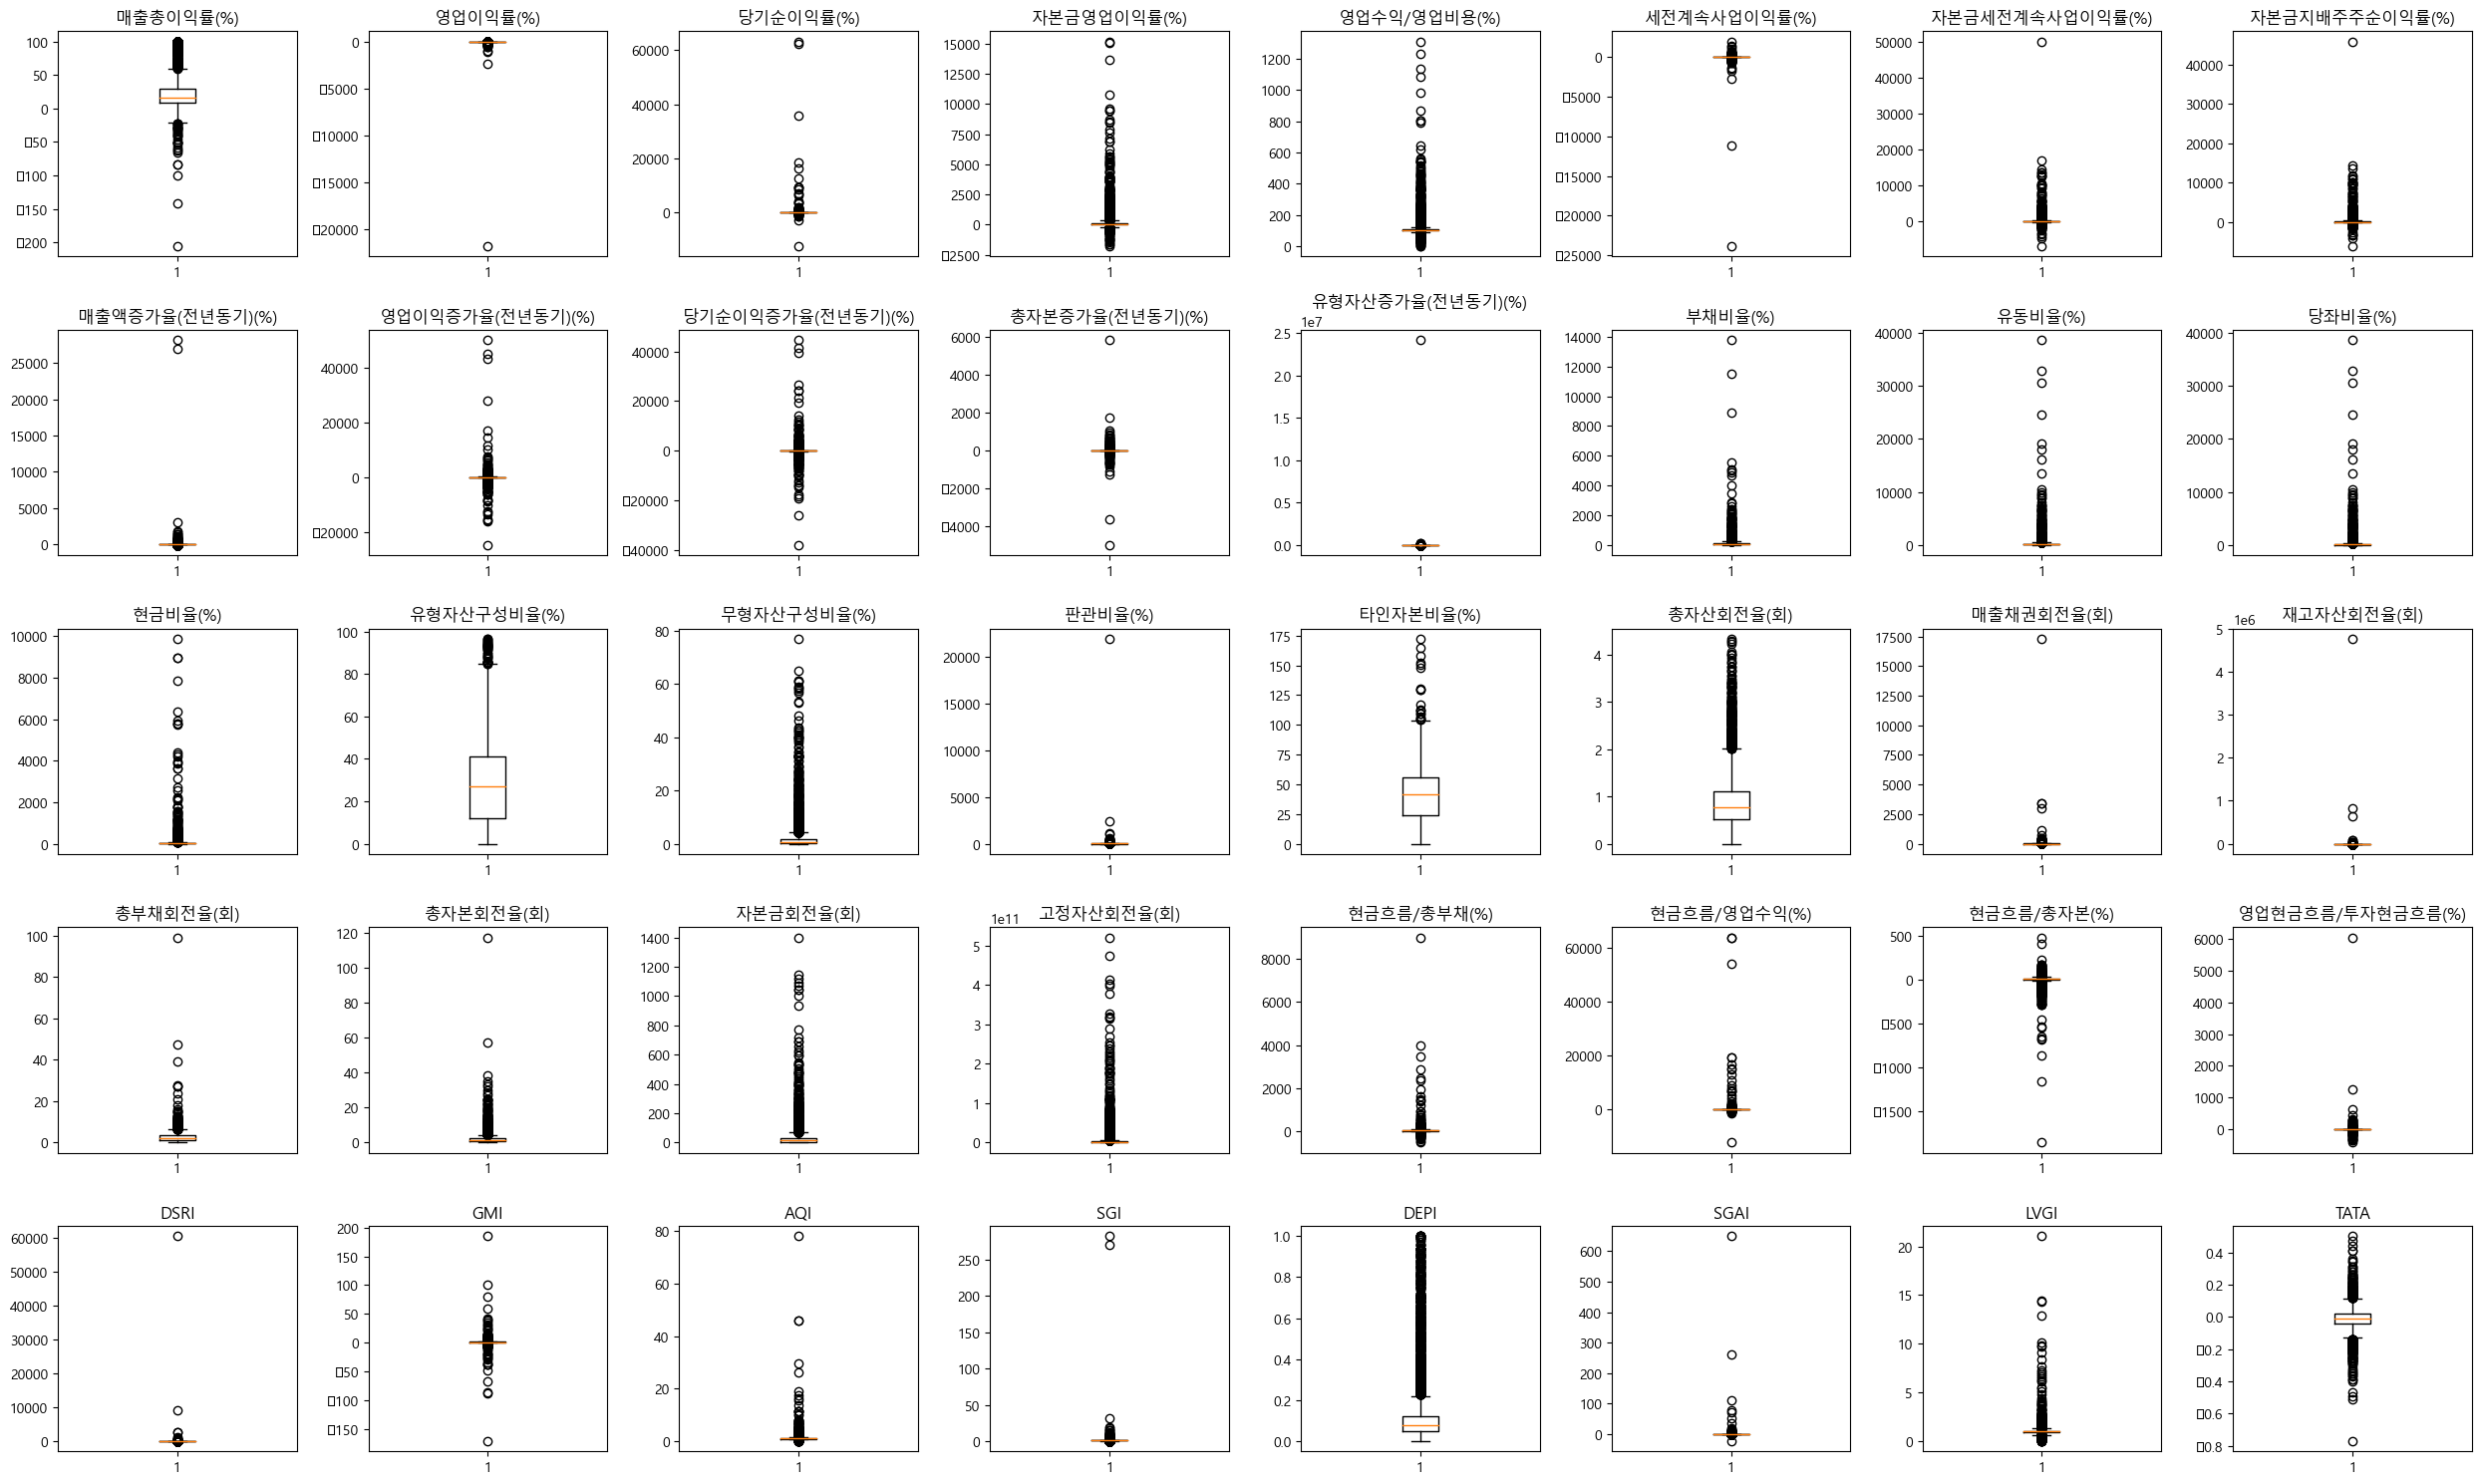

In [66]:
from matplotlib import font_manager, rc
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

selected_variables = X
# 5x4 subplot 생성
fig, axes = plt.subplots(5, 8, figsize=(25, 15))
axes = axes.flatten()  # 2D axes 배열을 1D 배열로 변환

for i, var in enumerate(selected_variables):
    # i번째 axes에 i번째 변수의 히스토그램을 그림
    axes[i].boxplot(df[var])
    axes[i].set_title(var)  # 각 히스토그램에 변수 이름을 제목으로 설정

plt.tight_layout()  # subplot 간격 조정
plt.show()

In [83]:
X.describe()

,매출총이익률(%),영업이익률(%),당기순이익률(%),자본금영업이익률(%),영업수익/영업비용(%),세전계속사업이익률(%),자본금세전계속사업이익률(%),자본금지배주주순이익률(%),매출액증가율(전년동기)(%),영업이익증가율(전년동기)(%),...,현금흐름/총자본(%),영업현금흐름/투자현금흐름(%),DSRI,GMI,AQI,SGI,DEPI,SGAI,LVGI,TATA
count,7045.000000,7045.000000,7045.000000,7045.000000,7045.000000,7045.000000,7045.000000,7045.000000,7045.000000,7045.000000,...,7045.000000,7045.000000,7045.000000,7045.000000,7045.000000,7045.000000,7045.000000,7045.000000,7045.000000,7045.000000
mean,25.065493,0.568680,40.660916,181.533177,110.691811,-2.201729,194.432747,159.960244,17.559564,-4.865143,...,5.577811,-0.222494,12.480297,0.993251,1.147693,1.175641,0.122159,1.243341,1.030345,-0.011956
std,26.836034,262.636209,1228.444085,644.693954,48.632283,322.695585,977.623231,883.709129,469.890616,1294.905639,...,42.088844,76.670781,729.080120,4.348038,1.464009,4.698871,0.146509,8.577774,0.545207,0.063974
min,-205.560000,-21800.490000,-12629.890000,-1797.390000,0.460000,-23898.620000,-6853.600000,-6209.970000,-99.990000,-24820.570000,...,-1855.370000,-412.215313,0.000000,-171.500000,0.030000,0.000000,0.000000,-22.520000,0.010000,-0.770000
25%,9.380000,0.920000,-0.020000,6.730000,100.920000,0.110000,0.680000,-0.180000,-6.190000,-52.910000,...,2.770000,-1.742358,0.860000,0.890000,0.930000,0.940000,0.050000,0.920000,0.910000,-0.040000
50%,15.710000,3.990000,3.050000,50.560000,104.150000,3.860000,47.670000,38.720000,2.660000,-6.610000,...,8.160000,-0.762581,0.980000,1.000000,1.010000,1.030000,0.080000,1.010000,0.990000,-0.010000
75%,29.550000,8.090000,7.240000,156.880000,108.810000,8.990000,173.320000,139.650000,12.620000,32.950000,...,14.610000,0.051974,1.110000,1.100000,1.120000,1.130000,0.120000,1.100000,1.070000,0.020000
max,100.000000,92.360000,63267.750000,15179.480000,1309.470000,1990.110000,50037.290000,45862.230000,28139.380000,50154.590000,...,482.850000,6046.062130,60380.450000,185.240000,78.070000,282.390000,1.000000,648.850000,21.050000,0.500000


#### 이상치 경계값 99랑 1로 설정해서 윈저라이징

In [68]:
import numpy as np

def outliers_iqr(df, col):
    ## 1사분위수, 3사분위수 변수에 대입
    quartile_1, quartil3_3 = np.percentile(df[col], [1, 99])
    ## iqr 값을 대입
    iqr = quartil3_3 - quartile_1
    ## 하단 경계의 값, 상단 경계의 값
    lower_whis = quartile_1 - (1.5 * iqr)
    upper_whis = quartil3_3 + (1.5 * iqr)
    #print(f'하단 경계의 값 : {lower_whis}, 상단 경계의 값 : {upper_whis}')
    ## 데이터프레임에서 상단의 경계보다 크거나 하단의 경계보다 작은 데이터를 출력
    #outliers = df[(df[col] > upper_whis) | (df[col] < lower_whis)]
    df[col] = df[col].mask(df[col] < lower_whis, lower_whis)
    df[col] = df[col].mask(df[col] > upper_whis, upper_whis)
    return df
    #return outliers[[col]] # 시리즈가 아닌 데이터프레임 형태로 리턴

In [70]:
df.columns[4]

'매출총이익률(%)'

In [78]:
df.columns[4:44]

Index(['매출총이익률(%)', '영업이익률(%)', '당기순이익률(%)', '자본금영업이익률(%)', '영업수익/영업비용(%)',
       '세전계속사업이익률(%)', '자본금세전계속사업이익률(%)', '자본금지배주주순이익률(%)', '매출액증가율(전년동기)(%)',
       '영업이익증가율(전년동기)(%)', '당기순이익증가율(전년동기)(%)', '총자본증가율(전년동기)(%)',
       '유형자산증가율(전년동기)(%)', '부채비율(%)', '유동비율(%)', '당좌비율(%)', '현금비율(%)',
       '유형자산구성비율(%)', '무형자산구성비율(%)', '판관비율(%)', '타인자본비율(%)', '총자산회전율(회)',
       '매출채권회전율(회)', '재고자산회전율(회)', '총부채회전율(회)', '총자본회전율(회)', '자본금회전율(회)',
       '고정자산회전율(회)', '현금흐름/총부채(%)', '현금흐름/영업수익(%)', '현금흐름/총자본(%)',
       '영업현금흐름/투자현금흐름(%)', 'DSRI', 'GMI', 'AQI', 'SGI', 'DEPI', 'SGAI', 'LVGI',
       'TATA'],
      dtype='object')

In [84]:
for col in df.columns[4:44]:
    outliers_iqr(df, col)

In [86]:
df.describe()

,상장연도,회계년,매출총이익률(%),영업이익률(%),당기순이익률(%),자본금영업이익률(%),영업수익/영업비용(%),세전계속사업이익률(%),자본금세전계속사업이익률(%),자본금지배주주순이익률(%),...,DSRI,GMI,AQI,SGI,DEPI,SGAI,LVGI,TATA,벤포드,분식기업
count,7045.000000,7045.000000,7045.000000,7045.000000,7045.000000,7045.000000,7045.000000,7045.000000,7045.000000,7045.000000,...,7045.000000,7045.000000,7045.000000,7045.000000,7045.000000,7045.000000,7045.000000,7045.000000,7045.000000,7045.000000
mean,1994.115401,2017.212775,25.069787,4.229499,3.640796,175.159595,110.249373,2.701581,179.801767,146.287367,...,1.078748,0.999686,1.115054,1.083107,0.122159,1.063205,1.018942,-0.011950,0.094109,0.019730
std,14.034188,3.153557,26.801524,20.713252,58.045991,545.798144,41.065854,49.095407,653.742596,584.101070,...,0.887946,1.306851,0.645519,0.501450,0.146509,0.484142,0.343442,0.063909,0.292001,0.139082
min,1956.000000,2012.000000,-175.308000,-256.255800,-559.566800,-1797.390000,0.460000,-532.040000,-5565.449200,-4997.339400,...,0.000000,-12.074600,0.030000,0.000000,0.000000,-3.309000,0.010000,-0.730000,0.000000,0.000000
25%,1986.000000,2015.000000,9.380000,0.920000,-0.020000,6.730000,100.920000,0.110000,0.680000,-0.180000,...,0.860000,0.890000,0.930000,0.940000,0.050000,0.920000,0.910000,-0.040000,0.000000,0.000000
50%,1994.000000,2017.000000,15.710000,3.990000,3.050000,50.560000,104.150000,3.860000,47.670000,38.720000,...,0.980000,1.000000,1.010000,1.030000,0.080000,1.010000,0.990000,-0.010000,0.000000,0.000000
75%,2006.000000,2020.000000,29.550000,8.090000,7.240000,156.880000,108.810000,8.990000,173.320000,139.650000,...,1.110000,1.100000,1.120000,1.130000,0.120000,1.100000,1.070000,0.020000,0.000000,0.000000
max,2022.000000,2022.000000,100.000000,92.360000,551.908400,6699.184600,654.151800,496.731200,7875.590800,6938.086200,...,11.107000,13.946200,8.988000,6.698400,1.000000,6.433400,5.002400,0.500000,1.000000,1.000000


In [87]:
df['자본금영업이익률(%)'].max()

6699.184599999997

In [ ]:
from matplotlib import font_manager, rc
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

selected_variables = df[4:44]
# 5x4 subplot 생성
fig, axes = plt.subplots(5, 8, figsize=(25, 15))
axes = axes.flatten()  # 2D axes 배열을 1D 배열로 변환

for i, var in enumerate(selected_variables):
    # i번째 axes에 i번째 변수의 히스토그램을 그림
    axes[i].boxplot(df[4:44][var])
    axes[i].set_title(var)  # 각 히스토그램에 변수 이름을 제목으로 설정

plt.tight_layout()  # subplot 간격 조정
plt.show()

C:\Users\Master\AppData\Local\Temp\ipykernel_13668\1258008544.py:20: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
c:\Users\Master\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


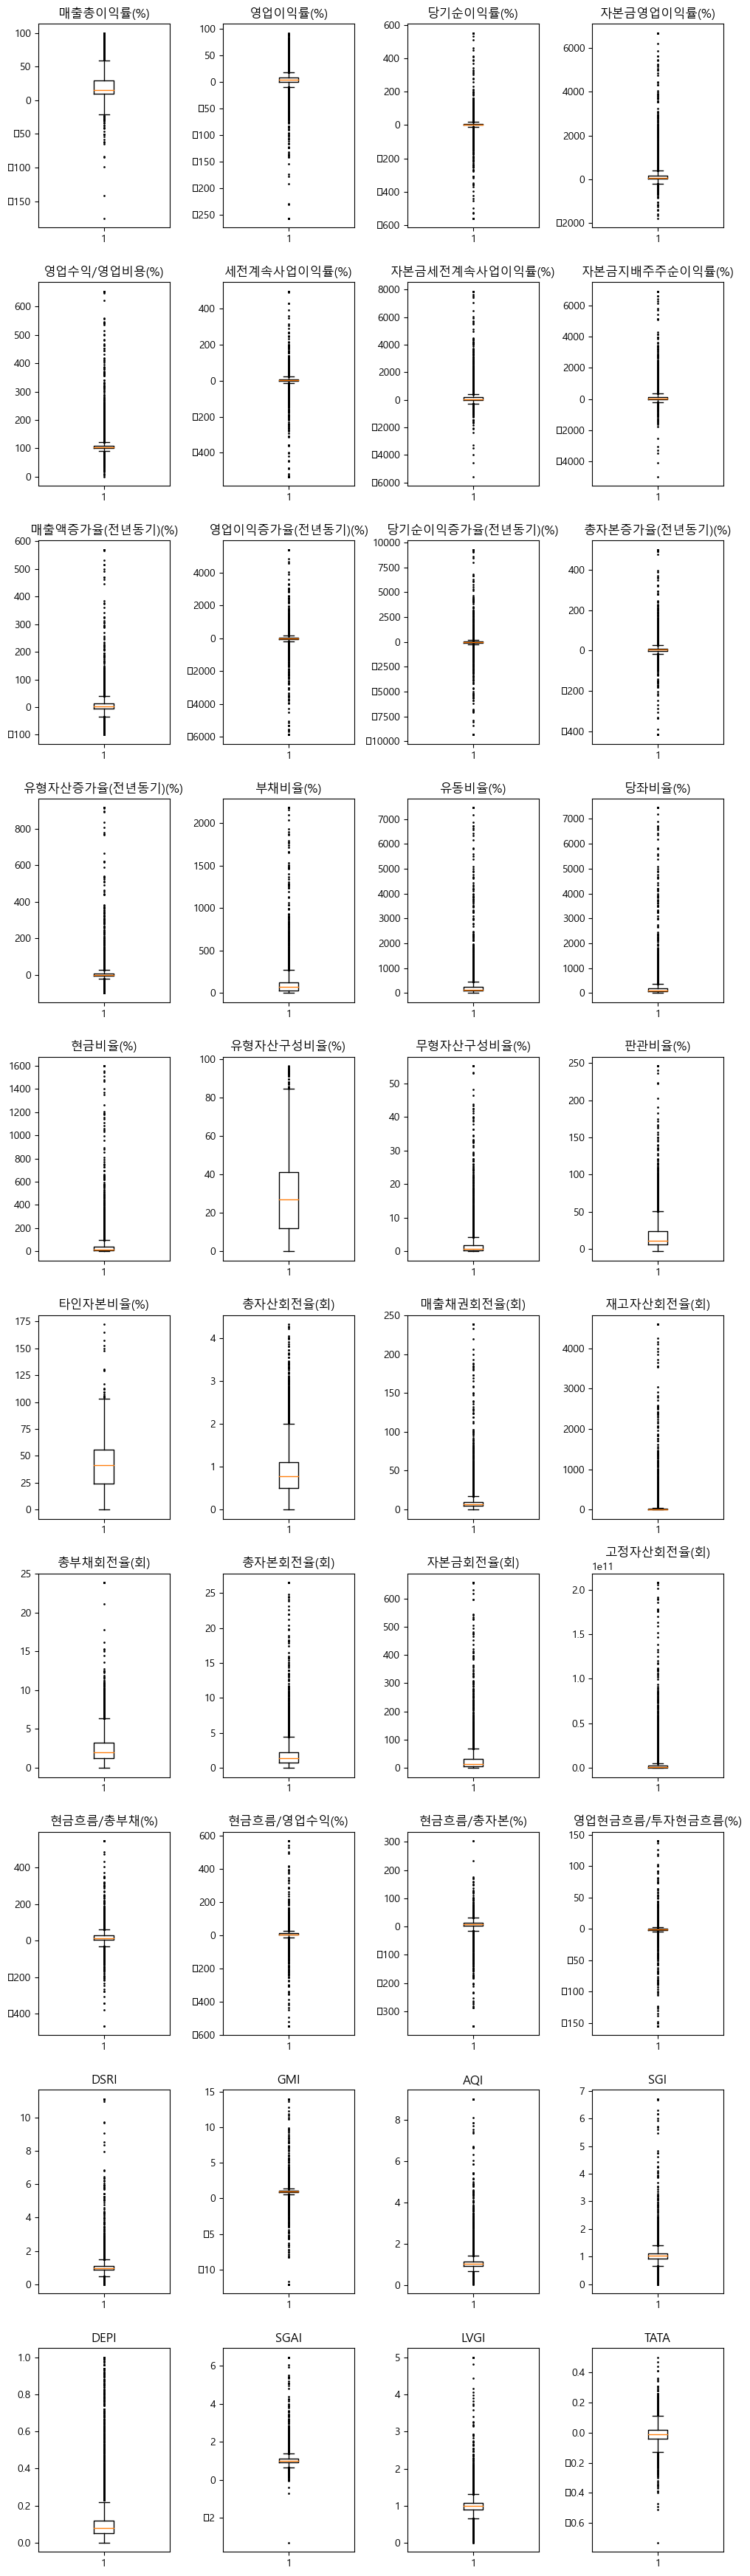

In [90]:
import matplotlib.pyplot as plt

# 39개의 칼럼을 나눌 때, 예를 들어 3x13의 그리드를 사용할 수 있습니다.
num_rows = 10
num_cols = 4

# 그래프의 크기를 조정합니다.
plt.figure(figsize=(10, 35))

# 점 크기 조절을 위한 옵션 설정
flierprops = dict(marker='o', markersize=1, linestyle='none')

# 각 칼럼에 대한 상자그림을 그립니다.
for i, col in enumerate(df.columns[4:44]):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.boxplot(df[col], flierprops=flierprops)
    plt.title(col)

# 레이아웃을 조정합니다.
plt.tight_layout()
plt.show()

* --------------------------------------------------------------------------------------------------

In [91]:
# 저장
df.to_csv('코스피이상치99%처리.csv', index=False, encoding='utf-8-sig')